# Differentail Equation

## slope field 绘图
### computer graph
1) pick point f(x,y) 等距离  
2) 计算出每一个 f(x,y)  
3) 绘制出每一个 f(x,y) 的线素  

### human
1) pick slope c  
2) $f(x,y) = c$  
3) 绘制出线素  

## 欧拉数值法 
### IVP(initial value problem)
$$ y' = f(x, y) $$
$$ y(x_{0}) = y_{0} $$


### 陷阱
- 非连续函数(存在奇点） $y' = y^2$

## 分离变量法

## first-order linear(一阶线性)
### method
- 标准线性方程 $y' + py = q$
- calc integrate factor of $u = e^{\int pdx}$
- multiply both side
- integrate


## 一阶方程换元法
### direct 直接代换  $T1 = T/M$
伯努利方程

### inverse 反向代换 $T = MT1$

## homogeneous ODE's
$$ y' = F(y/x) $$
$$ y' = x^2y/x^3+y^3 = \frac{y/x}{1 + (y/x)^3} $$

## autonomous 一阶自治ODE

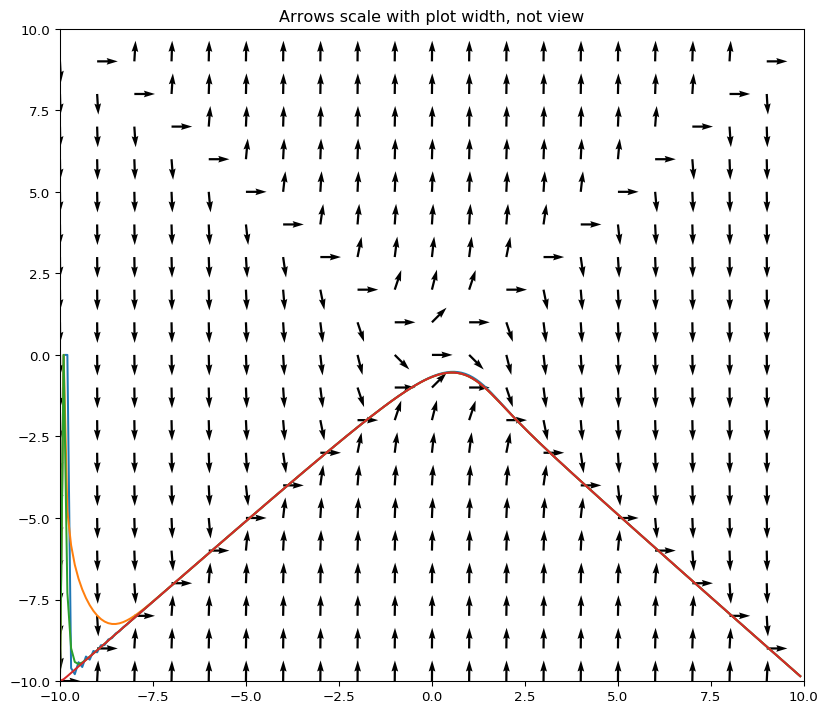

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

X, Y = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))
U = 1
V = Y**2 - X**2 # df 

N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N

plt.figure(figsize=(10, 9), dpi= 96)
plt.title('Arrows scale with plot width, not view')
Q = plt.quiver(X, Y, U2, V2, units='width')
# qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')

# euler first order method
def euler(df, y0, t):
    Y = np.zeros(t.size)
    Y[0] = y0
    slope = df(y0, t[0])
    for n in range(1, t.size - 1):
        Y[n+1] = Y[n] + slope*(t[n + 1] - t[n])
        slope = df(Y[n+1], t[n+1])
        
    return Y
# RK2
def euler2(df, y0, t):
    Y = np.zeros(t.size)
    Y[0] = y0
    slope = df(y0, t[0])
    for n in range(1, t.size - 1):
        tmpY = Y[n] + (slope)*(t[n + 1] - t[n])
        tmpSlope = df(tmpY, t[n+1])
        Y[n+1] = Y[n] + ((tmpSlope + slope)/2) * (t[n+1]-t[n])
        slope = df(Y[n+1], t[n+1])
        
    return Y

# RK4
def euler4(df, y0, t):
    Y = np.zeros(t.size)
    Y[0] = y0
    for n in range(1, t.size - 1):
        k1 = df(Y[n], t[n])
        k2 = df(Y[n] + k1*(0.5*(t[n+1]- t[n])), t[n] + 0.5*(t[n+1]- t[n]))
        k3 = df(Y[n] + k2*(0.5*(t[n+1]- t[n])), t[n] + 0.5*(t[n+1]- t[n]))
        k4 = df(Y[n] + k3*(t[n+1] - t[n]), t[n+1])
        Y[n+1] = Y[n] + ((1/6)*(k1 + 2*k2 + 2*k3 + k4)) * (t[n+1]-t[n])
        
    return Y

T = np.arange(-10, 10, .1)
df = lambda y, t: y**2 - t**2
df_initY = -10
# print(list(zip(T, euler(lambda y, t: t - 2*y, -10, T))))
plt.plot(T, euler(df, df_initY, T))
plt.plot(T, euler2(df, df_initY, T))
plt.plot(T, euler4(df, df_initY, T))
plt.plot(T, odeint(df, df_initY, T))


plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

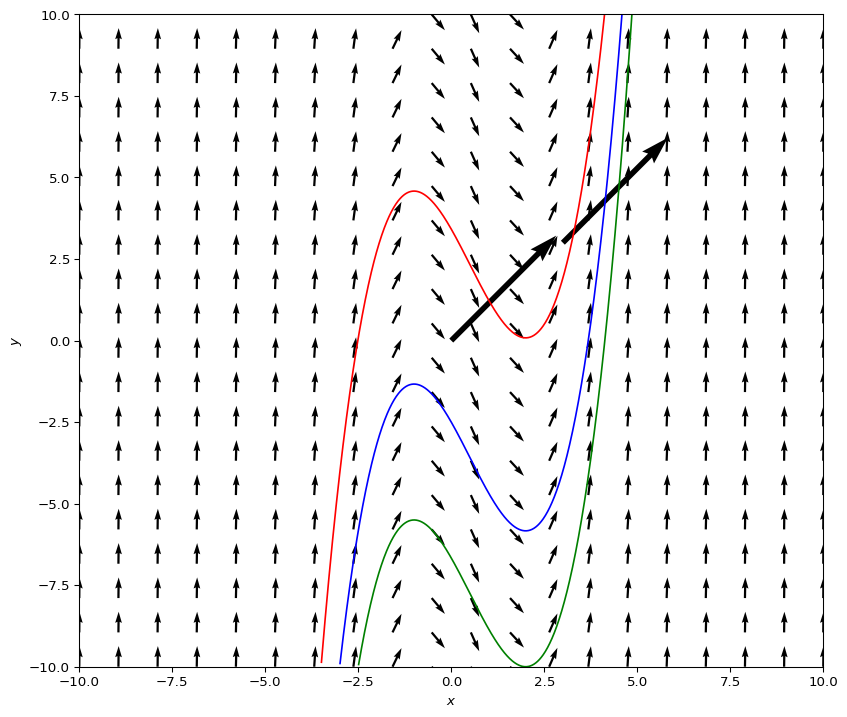

In [3]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np

fig = plt.figure(figsize=(10, 9), dpi= 96)
ax=fig.add_subplot(111)

## Vector field function
def vf(t,x):
  dx=np.zeros(2)
  dx[0]=1
  dx[1]=x[0]**2-x[0]-2
  return dx

#Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)
ic=[[-3.5,-10], [-3,-10], [-2.5,-10]]
color=['r','b','g']
for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 1.25)

#Vector field
X,Y = np.meshgrid( np.linspace(-10,10,20),np.linspace(-10,10,20) )
U = 1
V = X**2-X-2
#Normalize arrows
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2, )
ax.quiver( [0, 3], [0, 3], [3, 3], [3, 3], scale=1, units='xy')

# plt.axis('equal')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

# Recitaltion
## 01
### Intro
某非洲政府尝试提出一个好的对策关于羚羊猎杀。他们使用如下模型：羚羊种群存在一个自然增长率`k`,假设一个猎杀羚羊率为 `a/年`

### Task
1) 写出羚羊种群数的模型。
2) 假设 `a = 0`，求物种数量翻倍的时间`T`
3) 找出这个方程
4) 找出满足这个方程的 ODE
5) 存在一个 `steady state`，找到它。
6) 画出这个 `steady state` 函数
